In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",)


Mounted at /content/gdrive


In [ ]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Colab Notebooks/archive')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)


/content/gdrive/My Drive/Colab Notebooks/archive
/content/gdrive/My Drive/Colab Notebooks/archive


In [ ]:

for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Colab Notebooks/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/My Drive/Colab Notebooks/archive/train.csv
/content/gdrive/My Drive/Colab Notebooks/archive/gaussian_filtered_images/gaussian_filtered_images/export.pkl
/content/gdrive/My Drive/Colab Notebooks/archive/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/07122e268a1d.png
/content/gdrive/My Drive/Colab Notebooks/archive/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/080ee76c958c.png
/content/gdrive/My Drive/Colab Notebooks/archive/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/02dda30d3acf.png
/content/gdrive/My Drive/Colab Notebooks/archive/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/0243404e8a00.png
/content/gdrive/My Drive/Colab Notebooks/archive/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/03a7f4a5786f.png
/content/gdrive/My Drive/Colab Notebooks/archive/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/080f66eedfb9.png
/content/gdrive/My Drive/Colab Notebooks/arch

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("21_training.tif", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


AttributeError: ignored

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import MiniBatchKMeans

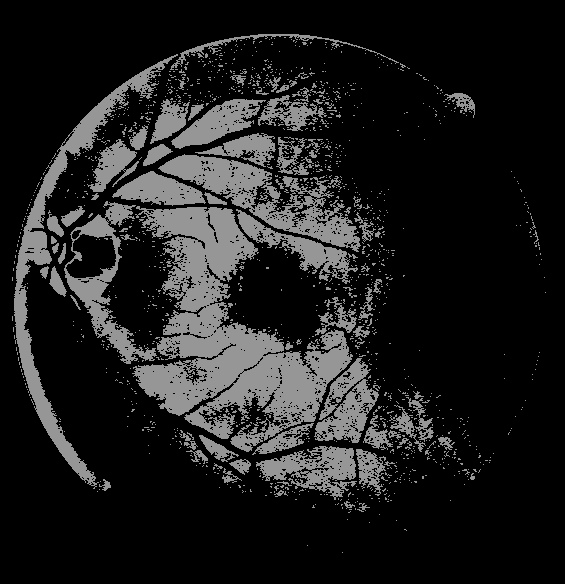

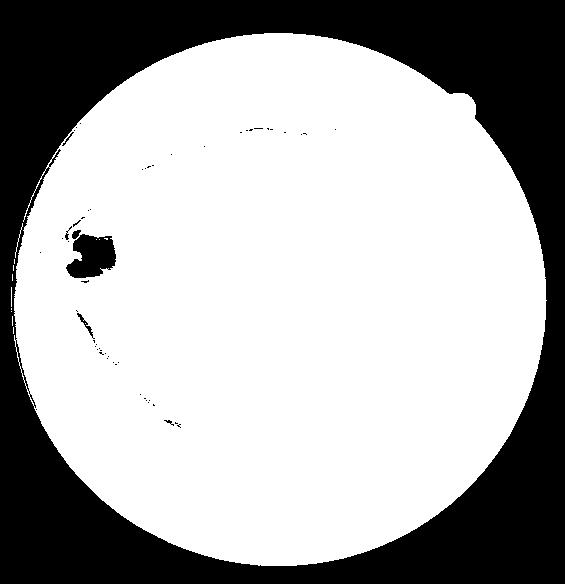

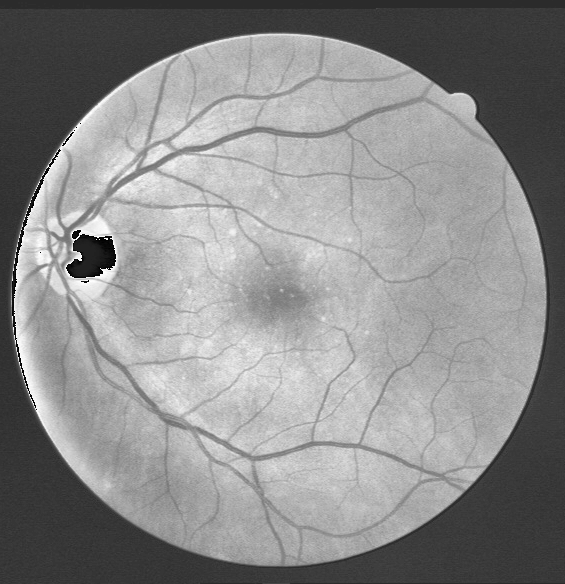

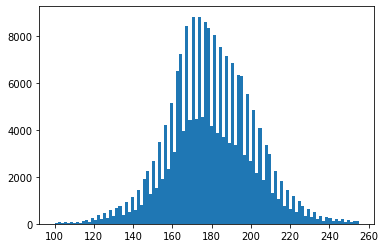

In [ ]:
image_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

cl_img = clahe.apply(image_bw) +40

plt.hist(cl_img.flat, bins=100, range=(100,255))

ret ,thresh1 = cv2.threshold(cl_img, 190 ,150 , cv2.THRESH_BINARY)
ret2 ,thresh2 = cv2.threshold(cl_img , 0,255 , cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
backtorgb = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2RGB)

cv2_imshow(thresh1)

cv2_imshow(thresh2)

cv2_imshow(cl_img)

In [ ]:
!pip install ConfigParser

In [ ]:
!pip install help_functions

ERROR: Could not find a version that satisfies the requirement help_functions (from versions: none)
ERROR: No matching distribution found for help_functions


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install -q efficientnet

     |████████████████████████████████| 50 kB 3.8 MB/s 


In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/archive/gaussian_filtered_images/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/archive/gaussian_filtered_images/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
import efficientnet.tfkeras as efn

In [ ]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [ ]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=40,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/40
92/92 [==============================] - 1269s 14s/step - loss: 1.0270 - acc: 0.6486 - val_loss: 1.0889 - val_acc: 0.5773 - lr: 1.0000e-04
Epoch 2/40
92/92 [==============================] - 658s 7s/step - loss: 0.7424 - acc: 0.7298 - val_loss: 0.9570 - val_acc: 0.6389 - lr: 1.0000e-04
Epoch 3/40
92/92 [==============================] - 672s 7s/step - loss: 0.6584 - acc: 0.7544 - val_loss: 0.7669 - val_acc: 0.7278 - lr: 1.0000e-04
Epoch 4/40
92/92 [==============================] - 671s 7s/step - loss: 0.5751 - acc: 0.7844 - val_loss: 0.7002 - val_acc: 0.7401 - lr: 1.0000e-04
Epoch 5/40
92/92 [==============================] - 659s 7s/step - loss: 0.5614 - acc: 0.7943 - val_loss: 0.6668 - val_acc: 0.7579 - lr: 1.0000e-04
Epoch 6/40
92/92 [==============================] - 658s 7s/step - loss: 0.5257 - acc: 0.8028 - val_loss: 0.6317 - val_acc: 0.7839 - lr: 1.0000e-04
Epoch 7/40
92/92 [==============================] - 666s 7s/step - loss: 0.5179 - acc: 0.8110 - val_loss: 0.58

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: 
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [ ]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)